Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Accuracy:  0.8439620081411127


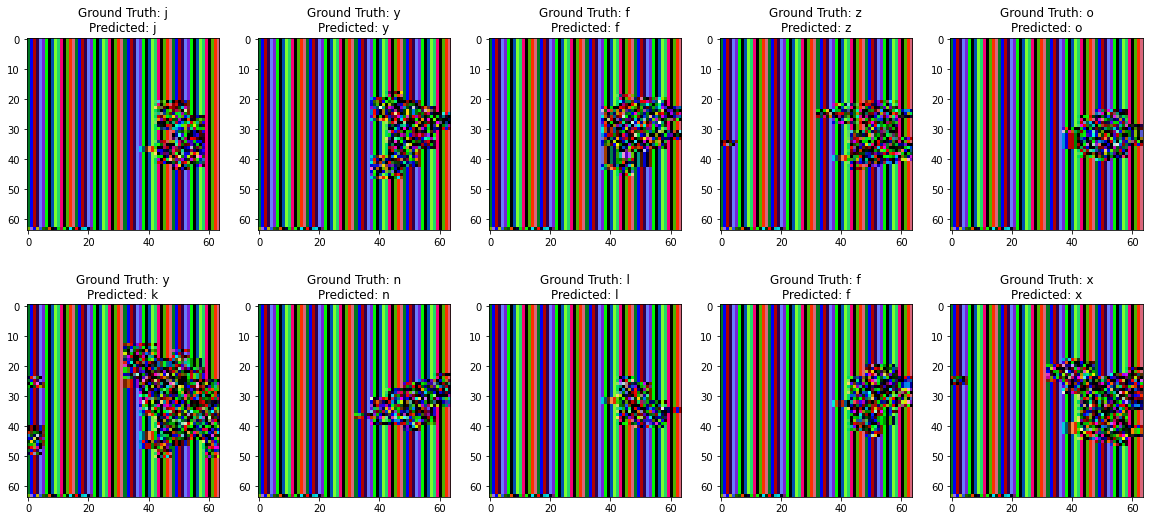

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision
import glob
import torch.nn.functional as F

def BasicBlock(in_channels, out_channels, max_pool=False):
    layers = []
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
    layers.append(nn.BatchNorm2d(out_channels))
    layers.append(nn.ReLU(inplace=True))
    if max_pool: 
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.conv1 = BasicBlock(in_channels, 64)
        self.conv2 = BasicBlock(64, 128, max_pool=True)
        self.res1 = nn.Sequential(BasicBlock(128, 128), BasicBlock(128, 128))
        self.conv3 = BasicBlock(128, 256, max_pool=True)
        self.conv4 = BasicBlock(256, 512, max_pool=True)
        self.res2 = nn.Sequential(BasicBlock(512, 512), BasicBlock(512, 512))
        self.fc = nn.Sequential(nn.MaxPool2d(4), nn.Flatten(), nn.Dropout(0.2), nn.Linear(512, num_classes))
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.fc(out)
        return out

classes = ['f','j','k','l','m','n','o','x','y','z']

transformer = transforms.Compose([
    transforms.ToTensor(),
#     transforms.Resize(32),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

test_path = 'data_letters/test'

dataset = torchvision.datasets.ImageFolder(test_path, transform=transformer)

dataloader = DataLoader(
    dataset,
    batch_size = 256,
    shuffle = True
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = ResNet9(3,10)
model = torchvision.models.resnet34(pretrained=False)
inchannel = model.fc.in_features
model.fc = nn.Linear(inchannel, 10)
best_model = torch.load('model/task1-resnet34-pretrained-adam-30.model')
model.load_state_dict(best_model, strict=False)
model.to(device)
count = len(dataset)
model.eval()
sum_accuracy = 0.0

for i, (images, labels) in enumerate(dataloader):
    if torch.cuda.is_available():
        images = images.to(device)
        labels = labels.to(device)
    outputs = model(images)
    _,prediction = torch.max(outputs.data,1)
    sum_accuracy += int(torch.sum(prediction==labels.data))

accuracy = sum_accuracy / count

print(f'Accuracy: ', accuracy)

f = plt.figure(figsize=(20,9))
for i in range(10):
    subfigure = f.add_subplot(2, 5, i+1)
    subfigure.title.set_text("Ground Truth: " + classes[labels.data[i]] + "\n""Predicted: " + classes[prediction[i]])
    img = images[i].numpy()
    subfigure.imshow(np.moveaxis(img, 0, -1))
plt.show()